In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


GD6.xlsx
GD6_clean.csv
Gd6.csv
df.csv
hayden.mp3
movie_ratings.csv
test.csv
train.csv
xAPI-Edu-Data.csv
~$grade6.xlsx



In [4]:
# Import data, start exploratory data analysis
edm = pd.read_csv('data/xAPI-Edu-Data.csv')
edm.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
edm.Class.unique()

array(['M', 'L', 'H'], dtype=object)

In [11]:
edm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [12]:
# Some of the columns seem to have random capitalizations in then, let's make this look a bit tidier

edm.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality',
                               'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},
                               inplace=True)

- Visualizations
Great, our dataset has no missing values! This is quite rare for a data scientist, but it's a good thing so let's start visualizing.



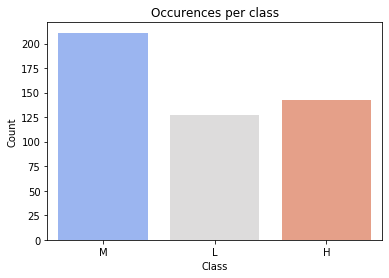

In [14]:
# Counts per class --> Is the dataset unbalanced?
counts = sns.countplot(x='Class', data=edm, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Count', title='Occurences per class')
plt.show()

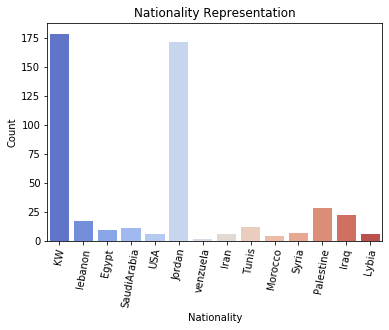

In [15]:
# Exploring nationalities
nat = sns.countplot(x='Nationality', data=edm, palette='coolwarm')
nat.set(xlabel='Nationality', ylabel='Count', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()

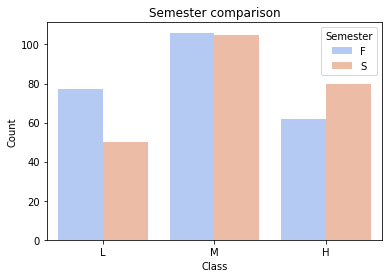

In [16]:
# Semester comparison
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=edm, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

- Mmh ... It looks like students's performed a bit better in the second semester ('S') than in the first semester ('F'). Suprisingly, the middle class stays the same but the lower class has less students in the second semester and the higher class has more students. Let's explore gender next.

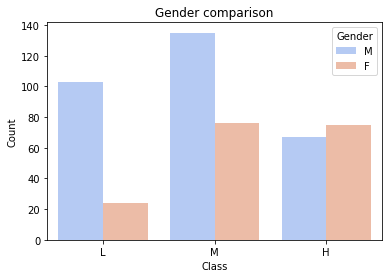

In [17]:
# gender comparison
plot = sns.countplot(x='Class', hue='Gender', data=edm, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

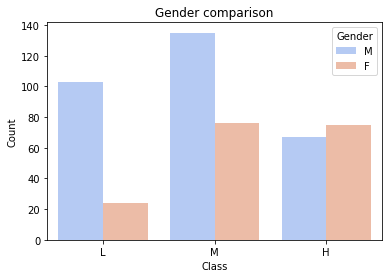

In [18]:
# gender comparison
plot = sns.countplot(x='Class', hue='Gender', data=edm, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

- It looks like women performed better than men on average. Would the amount of visited resources in the online environment influence the final grade?

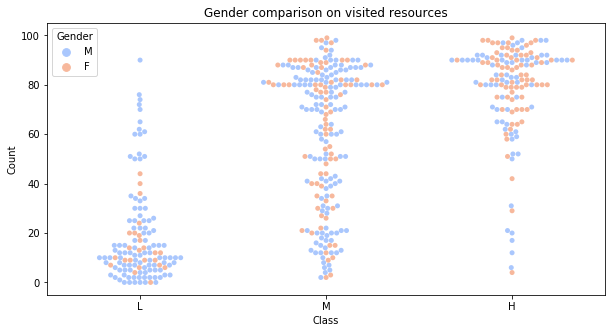

In [21]:
plot = sns.swarmplot(x='Class', y='VisitedResources', hue='Gender', order=['L', 'M', 'H'], 
              data=edm, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

- This swarm plot shows us that students who received a lower grade (L) visited way fever resources than students that scored a M or H grade. Additionally, women who received a high mark (H) almost exclusively visited a lot of the online resources.

/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'lw', 'marker'
  cset = contour_func(xx, yy, z, n_lev

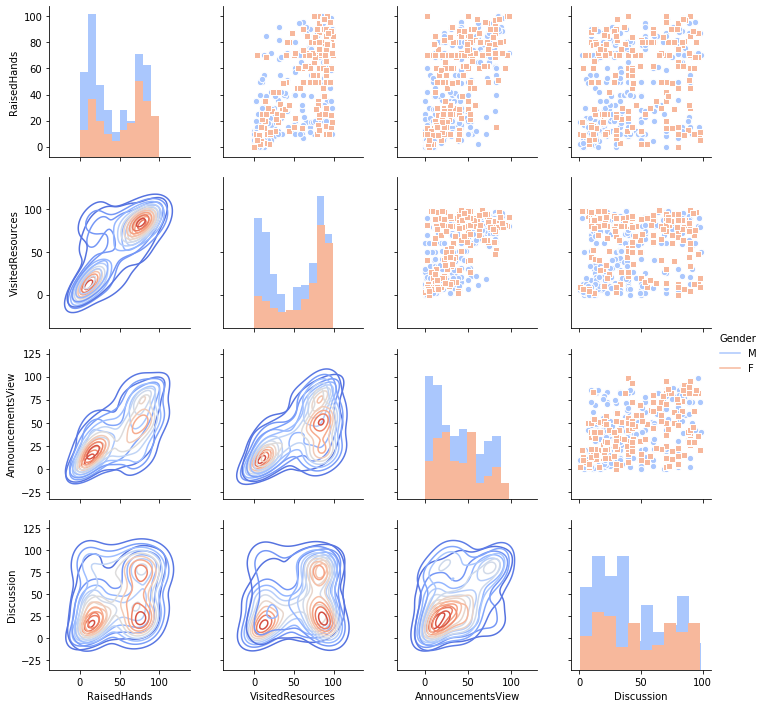

In [22]:
# Pairgrid, exploring our numerical variables and keeping the gender comparison
g = sns.PairGrid(edm, hue='Gender', palette='coolwarm', hue_kws={'marker': ['o', 's']})
g = g.map_diag(plt.hist)
g = g.map_upper(plt.scatter, linewidths=1, edgecolor='w', s=40)
g = g.map_lower(sns.kdeplot, lw=3, legend=False, cmap='coolwarm')
g = g.add_legend()

# Machine Learning
Now we get to the machine learning section. We will start by encoding our categorical variables and splitting the data into a train and test set.

In [23]:
X = edm.drop('Class', axis=1)
y = edm['Class']

# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [59]:
pwd

'/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project'

In [27]:
# Logistic Regression as baseline, then exploring tree-based methods

keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=52)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Results for: Logistic Regression

[[37  1 14]
 [ 0 32  4]
 [ 8  7 41]]
              precision    recall  f1-score   support

           H       0.82      0.71      0.76        52
           L       0.80      0.89      0.84        36
           M       0.69      0.73      0.71        56

   micro avg       0.76      0.76      0.76       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.77      0.76      0.76       144

accuracy is 0.7638888888888888



Results for: Decision Tree

[[34  0 18]
 [ 2 30  4]
 [11  5 40]]
              precision    recall  f1-score   support

           H       0.72      0.65      0.69        52
           L       0.86      0.83      0.85        36
           M       0.65      0.71      0.68        56

   micro avg       0.72      0.72      0.72       144
   macro avg       0.74      0.73      0.74       144
weighted avg       0.73      0.72      0.72       144

accuracy is 0.7222222222222222



Results for: Random Forest

[[36  

# Random Forest
The Random Forest Classifier performed best. Let's explore the number of estimators in the forest further. A general rule is that the RFC performs better when the amount of estimators increases.

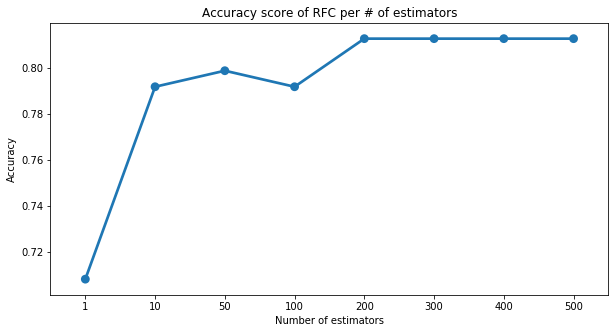

In [28]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

- And indeed, the RFC performs better when the number of estimators increases. However, it plateaus at 200 estimators. In the for loop before I used 300 estimators which is a general number I like to start trying it out with. Apparently 200 estimators is enough for this dataset. If you start experimenting on a very large dataset, having less estimators will save you a lot of running time.

- We can also explore another variable like the minimum number of samples required to be at a leaf node.

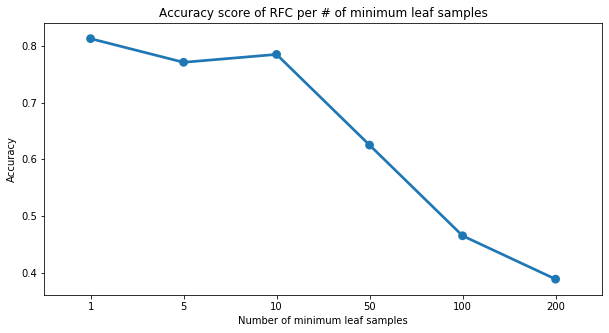

In [29]:
# Exploring minimum leaf samples
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=200, random_state=52, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()

- In this case we see that the accuracy score simply decreases as the minimum leaf samples increase. Therefore, it is best to keep this value at the default of 1.

# Extreme Gradient Boosting
Many Kaggle competitions have been won by using Extreme Gradient Boosting. I have never used it so let's give it a try. If you have any tips please share them in the comments.



In [31]:
xgb = XGBClassifier(seed=52)
pred = xgb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))  

[[38  0 14]
 [ 0 30  6]
 [ 4  5 47]]
              precision    recall  f1-score   support

           H       0.90      0.73      0.81        52
           L       0.86      0.83      0.85        36
           M       0.70      0.84      0.76        56

   micro avg       0.80      0.80      0.80       144
   macro avg       0.82      0.80      0.81       144
weighted avg       0.81      0.80      0.80       144

accuracy is 0.7986111111111112


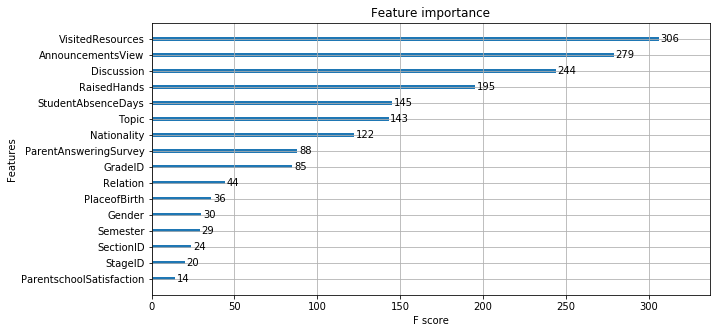

In [32]:
plot_importance(xgb)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

- the main feature in the XGB model is the number of visited resources. Earlier we saw that there was a big difference in visited resources between the L and M and H classes. Suprisingly, gender is very low on the feature importance list.

- Next step is to try and improve the performance of our XGB Classifier by trying some different parameters and using a grid search approach.

In [33]:
# Let's try to improve the accuracy of the XGClassifier with a grid search approach.

d_values = []
l_values = []
n_values = []
acc_values = []
depth = [2, 3, 4]
learning_Rate = [0.01, 0.1, 1]
n_estimators = [50, 100, 150, 200]
for d in depth:
    for l in learning_Rate:
        for n in n_estimators:
            xgb = XGBClassifier(max_depth=d, learning_rate=l, n_estimators=n, seed=52)
            pred = xgb.fit(X_train, y_train).predict(X_test)
            acc = accuracy_score(y_test, pred)
            d_values.append(d)
            l_values.append(l)
            n_values.append(n)
            acc_values.append(acc)
            
dict = {'max_depth':d_values, 'learning_rate':l_values, 'n_estimators':n_values,
       'accuracy':acc_values}

output = pd.DataFrame.from_dict(data=dict)
print(output.sort_values(by='accuracy', ascending=False)) 

    max_depth  learning_rate  n_estimators  accuracy
29          4           0.10           100  0.819444
31          4           0.10           200  0.812500
16          3           0.10            50  0.805556
20          3           1.00            50  0.805556
27          4           0.01           200  0.805556
28          4           0.10            50  0.798611
19          3           0.10           200  0.798611
4           2           0.10            50  0.798611
23          3           1.00           200  0.798611
17          3           0.10           100  0.798611
30          4           0.10           150  0.798611
22          3           1.00           150  0.798611
14          3           0.01           150  0.798611
5           2           0.10           100  0.791667
13          3           0.01           100  0.791667
15          3           0.01           200  0.791667
21          3           1.00           100  0.784722
7           2           0.10           200  0.

# Accuracy improved :

We can see that using a learning_rate of 0.1, a max_depth of 4 and 100 estimators in our XGB classifier provides an accuracy of 0.8194.

This is a nice improvement over our previous score of 0.7986

The XGB model now also performs better than the random forest classifier which capped at 0.8125

Let's explore the important features in this 'best' model.

[[39  0 13]
 [ 0 32  4]
 [ 5  4 47]]
              precision    recall  f1-score   support

           H       0.89      0.75      0.81        52
           L       0.89      0.89      0.89        36
           M       0.73      0.84      0.78        56

   micro avg       0.82      0.82      0.82       144
   macro avg       0.84      0.83      0.83       144
weighted avg       0.83      0.82      0.82       144

accuracy is 0.8194444444444444


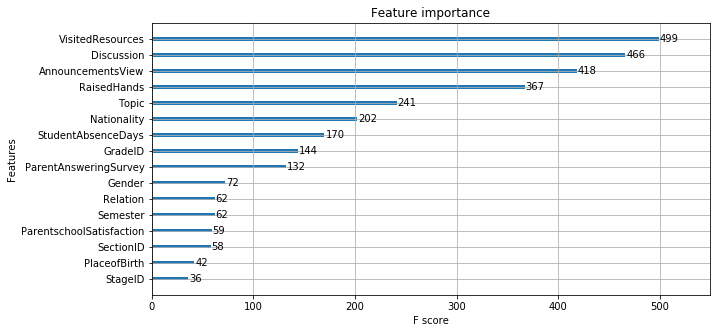

In [34]:
# Building the best XGB and looking at feature importances

xgb2 = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=100, seed=52)
pred = xgb2.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))   

plot_importance(xgb2)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

Let's explore the feature importances of our best Random Forest model as well.¶
-


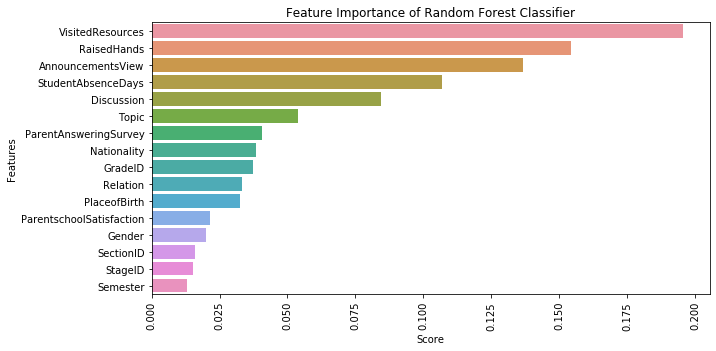

In [35]:
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

- Visited resources is the most important feature in both the XGB and the RFC model. However, many differences can be observed for the other features. Discussion, for example, is almost the most important feature in the XGB model but is much less important in the RFC model.

In [38]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 243kB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 286kB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn import linear_model
from sklearn import naive_bayes,neural_network
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
import itertools

In [40]:
tn = list(['High', 'Low', 'Medium'])

def plot_confusion_matrix(cm,target_names,title):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names,rotation=45)
        plt.yticks(tick_marks, target_names)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


def p_result(y_test,y_pred,title='Confusion Matrix'):

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm,tn,title)

    print('\n\nClassification Report:\n-----------------------\n', classification_report(y_test, y_pred))
    print('-------------------------------\n')



def decition_tree(x_train,x_test,y_train,y_test,rd):

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    p_result(y_test,y_pred,'Confusion Matrix of Decision Tree')
    # graph dot file output
    hd = list(rd)
    tree.export_graphviz(clf, out_file='tree.dot',feature_names= hd[:-1],  class_names= hd[-1])



def naive_bs(x_train,x_test,y_train,y_test):

    nb = naive_bayes.GaussianNB()
    nb.fit(x_train,y_train)
    pred = nb.predict(x_test)
    p_result(y_test,pred,'Confusion Matrix of Naive Bayes')


def neural_net(x_train,x_test,y_train,y_test):

    scale = StandardScaler()
    scale.fit(x_train)
    x_train = scale.transform(x_train)
    x_test = scale.transform(x_test)

    ann = neural_network.MLPClassifier(hidden_layer_sizes=(18),max_iter=1000,activation='logistic')

    ann.fit(x_train,y_train)
    pred = ann.predict(x_test)
    p_result(y_test,pred,'Confusion Matrix of Neural Network')


Decision Tree:
---------------------


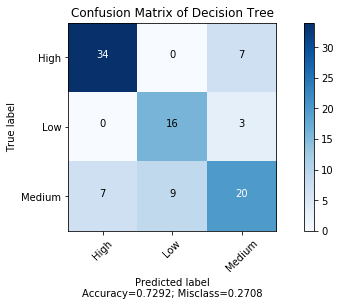



Classification Report:
-----------------------
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.64      0.84      0.73        19
           2       0.67      0.56      0.61        36

   micro avg       0.73      0.73      0.73        96
   macro avg       0.71      0.74      0.72        96
weighted avg       0.73      0.73      0.73        96

-------------------------------



In [42]:
kd = pd.read_csv('data/xAPI-Edu-Data.csv', delimiter=',')

le = preprocessing.LabelEncoder()
rd = kd.apply(le.fit_transform)

x = rd.drop('Class', axis=1)
y = rd['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

print("Decision Tree:")
print("---------------------")
decition_tree(x_train,x_test,y_train,y_test,rd)

Naive Bayes: 

---------------------


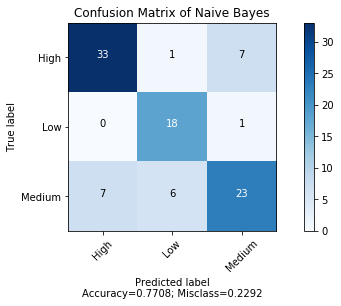



Classification Report:
-----------------------
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.72      0.95      0.82        19
           2       0.74      0.64      0.69        36

   micro avg       0.77      0.77      0.77        96
   macro avg       0.76      0.80      0.77        96
weighted avg       0.77      0.77      0.77        96

-------------------------------



In [43]:
print("Naive Bayes: \n")
print("---------------------")
naive_bs(x_train,x_test,y_train,y_test)

Neural Network: 

---------------------


/Users/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


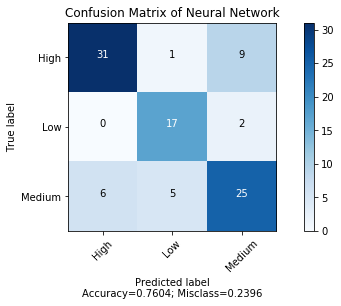



Classification Report:
-----------------------
               precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.74      0.89      0.81        19
           2       0.69      0.69      0.69        36

   micro avg       0.76      0.76      0.76        96
   macro avg       0.76      0.78      0.77        96
weighted avg       0.76      0.76      0.76        96

-------------------------------



In [44]:
print("Neural Network: \n")
print("---------------------")
neural_net(x_train,x_test,y_train,y_test)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Opt

/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/Users/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


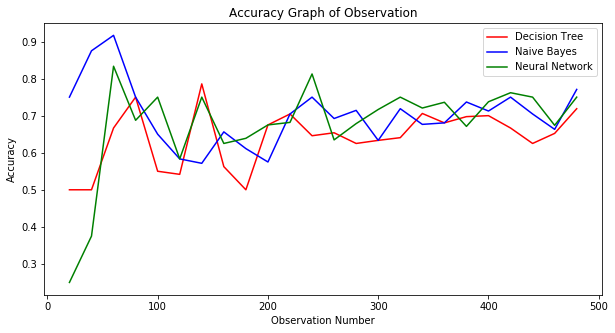

In [46]:
def observation():
    
    kd = pd.read_csv('data/xAPI-Edu-Data.csv', delimiter=',')

    le = preprocessing.LabelEncoder()
    rd = kd.apply(le.fit_transform)

    dc = DecisionTreeClassifier()
    nb = naive_bayes.GaussianNB()
    ann = neural_network.MLPClassifier(hidden_layer_sizes=(18), max_iter=1000, activation='logistic')


    XX,yy1,yy2,yy3= [],[],[],[]

    for tot in range(20,len(kd)+1,20):
        x = rd.drop('Class', axis=1)[:tot]
        y = rd['Class'][:tot]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)
        dc.fit(x,y)
        nb.fit(x,y)
        ann.fit(x,y)

        dc.fit(x_train, y_train)
        pred_1 = dc.predict(x_test)

        nb.fit(x_train, y_train)
        pred_2 = nb.predict(x_test)

        ann.fit(x_train, y_train)
        pred_3 = ann.predict(x_test)

        XX.append(tot)
        yy1.append(accuracy_score(y_test,pred_1))
        yy2.append(accuracy_score(y_test,pred_2))
        yy3.append(accuracy_score(y_test,pred_3))
        
    
    plt.figure(figsize=(10,5))
    plt.plot(XX,yy1,color='R',label='Decision Tree')
    plt.plot(XX,yy2,color='b',label='Naive Bayes')
    plt.plot(XX,yy3,color='g',label='Neural Network')
    plt.title("Accuracy Graph of Observation")
    plt.xlabel("Observation Number")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()




observation()

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import datasets 


rd = pd.read_csv('data/xAPI-Edu-Data.csv', delimiter=',');
rd[:10]  # Showing alignment of first 10 data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [48]:
rd.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


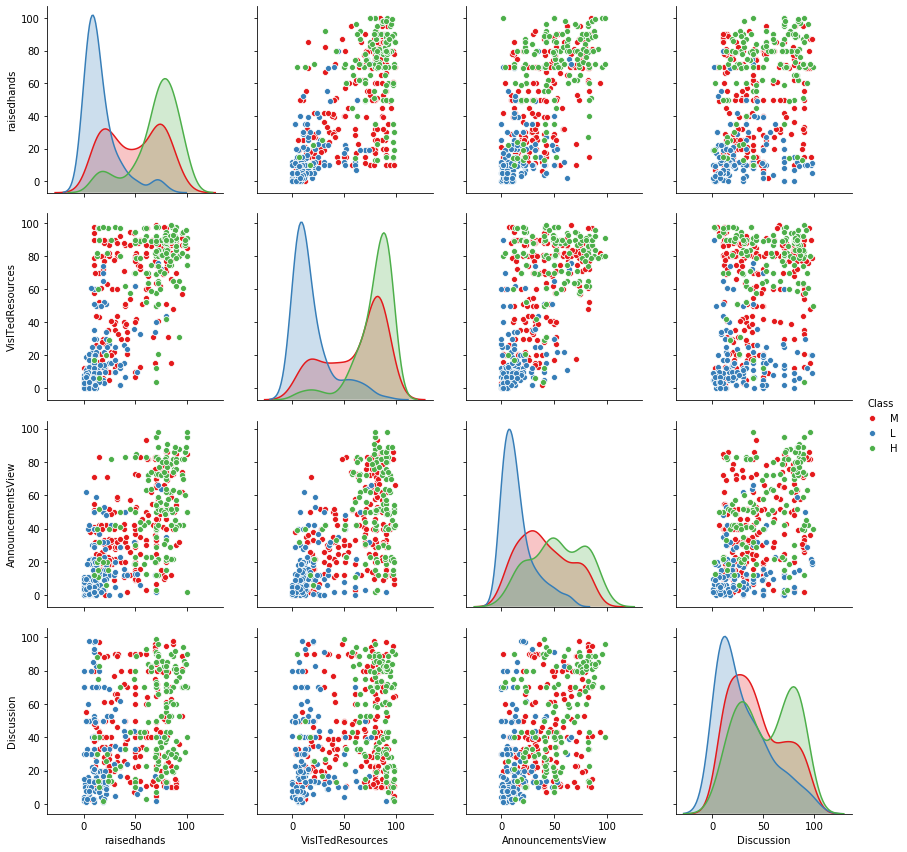

In [49]:
sb.pairplot(rd,hue='Class',palette='Set1',height=3);

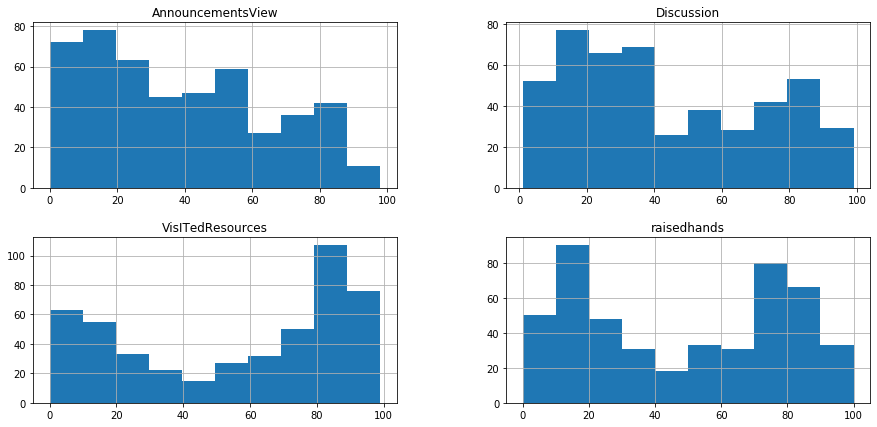

In [50]:
rd.hist(figsize=(15, 7));

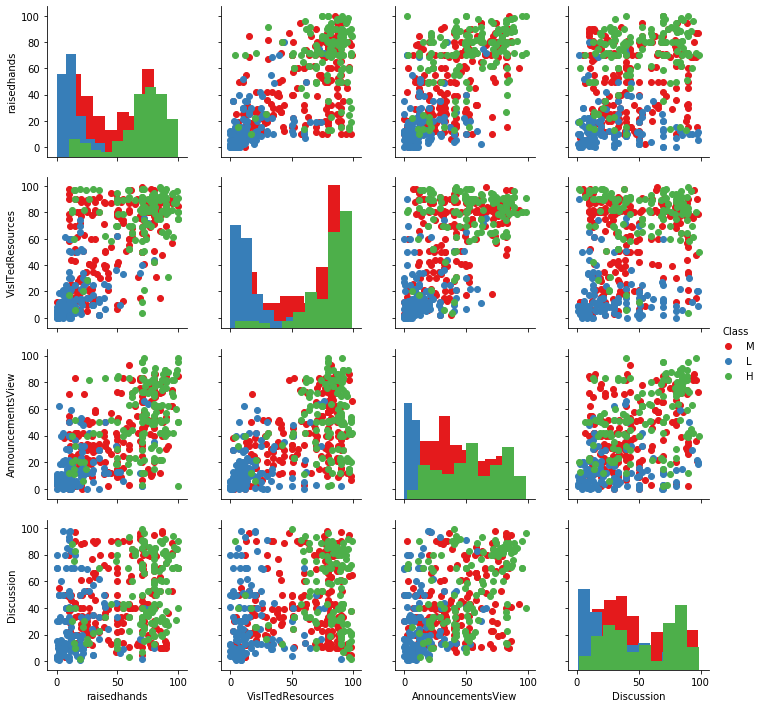

In [51]:
g = sb.PairGrid(rd, hue="Class",palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

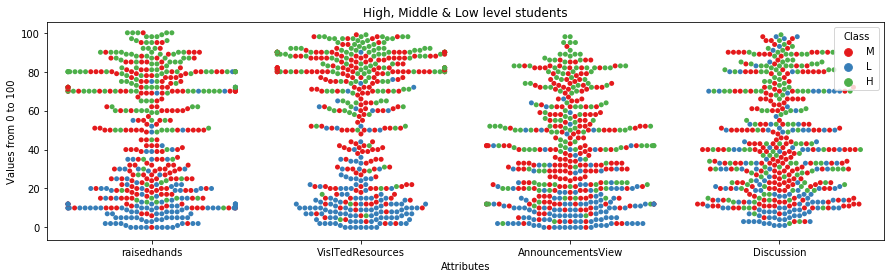

In [52]:
melt = pd.melt(rd,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView','Discussion'])
plt.rcParams['figure.figsize']=(15,4)
sb.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette='Set1')
plt.ylabel('Values from 0 to 100')
plt.xlabel('Attributes')
plt.title('High, Middle & Low level students');

# Visualization of catagorical data

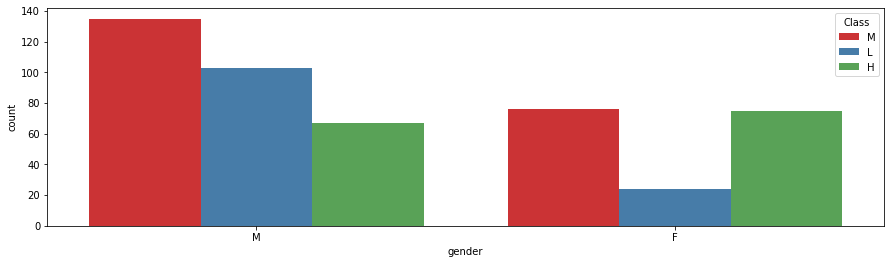

In [55]:
sb.countplot(data=rd,x='gender',hue='Class',palette='Set1');


- Though the number of male students is greater than the female but the percentage of High-level students are less than female students. On the other hand, low-level students in the male are quite a lot greater than the female students.

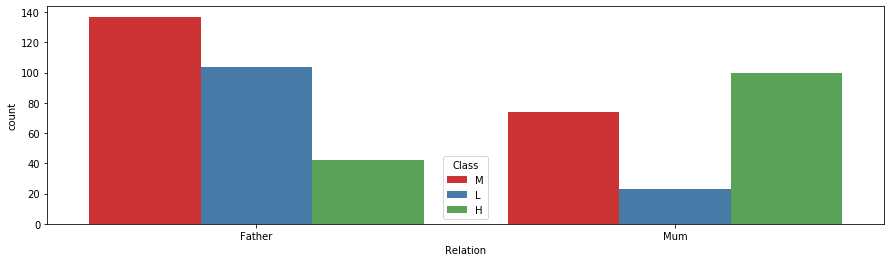

In [56]:
sb.countplot(data=rd,x='Relation',hue='Class',palette='Set1');

- 
It seems to have a relation with Mum has a very much positive impact on students performance

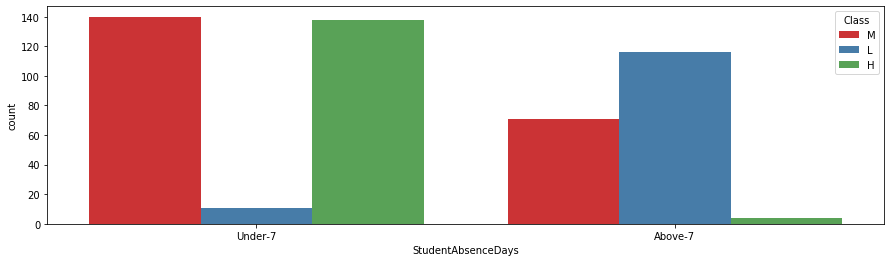

In [57]:
sb.countplot(data=rd,x='StudentAbsenceDays',hue='Class',palette='Set1');

- 
The above picture clearly states that the student who is absent less than 7 days is mostly the successful one. It means students absence has a high impact on their overall performance.

# Classification

In this part, 3 different machine learning approaches are implemented to perform the classification/prediction of a student's level based on the given dataset. By the following machine learning approaches, I tried to make a better model to classify/predict a students level.
- Linear Regression
- Logistic Regression
- Artificial Neural Network